In [1]:
import calculator
import numpy as np
from importlib import reload
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pp, pprint
from random import randint
import sys

print(sys.getrecursionlimit())

calculator = reload(calculator)
Expert = calculator.Expert

3000


In [2]:
# matrix = np.matrix(np.array([
#     [1,1,1,0,1,0], # птица
#     [1,1,0,1,0,1], # самолет
#     [1,1,0,0,0,0], # планер
# ])).T

# транспорт
properties = [
    "общественность", "электрический", "быстрее 50км\ч", "для одного человека", "есть шины", "применяется военными",
    "с ДВС", "надземный", "подземный", "городской"
]
classes = [
    "самолет", 
    "трамвай", 
    "автобус", 
    "машина", 
    "городской самокат", 
    # "монорельс", 
    "тепловоз", 
    # "электричка", 
    "танк",
    # "метро"
]
matrix = np.matrix(np.array([
    [1, 0, 1, 0, 1, 1, 0, 0, 0, 0],  # самолет
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],  # трамвай
    [1, 1, 1, 0, 1, 1, 1, 1, 0, 1],  # автобус
    [0, 1, 1, 0, 1, 1, 1, 1, 0, 1],  # машина
    [1, 1, 0, 1, 1, 0, 0, 1, 0, 1],  # городской самокат
    # [1, 1, 1, 0, 1, 0, 0, 1, 0, 1],  # монорельс
    [0, 0, 1, 0, 0, 1, 1, 1, 0, 0],  # тепловоз
    # [1, 1, 1, 0, 0, 0, 0, 1, 1, 0],  # электричка
    [0, 0, 0, 0, 0, 1, 1, 1, 0, 0],  # танк
    # [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],  # метро
])).T
for i, val1 in enumerate(classes):
    for j, val2 in enumerate(classes):
        if j > i:
            if np.all(matrix[:, i] == matrix[:, j]):
                print(val1, val2)
matrix.shape

(10, 7)

In [3]:
prediction_matrices = []
ex = Expert(matrix)
ex.train(lambda x: prediction_matrices.append(x.prediction_matrix.copy()))
ex.prediction_matrix

matrix([[-2., -2., -2., -4., -2., -4., -4.],
        [-4., -2., -2., -2., -2., -4., -4.],
        [-3., -3., -3., -3., -5., -3., -5.],
        [-1., -1., -1., -1.,  1., -1., -1.],
        [-2., -4., -2., -2., -2., -4., -4.],
        [-3., -5., -3., -3., -5., -3., -3.],
        [-4., -4., -2., -2., -4., -2., -2.],
        [-6., -4., -4., -4., -4., -4., -4.],
        [-1.,  1., -1., -1., -1., -1., -1.],
        [-4., -2., -2., -2., -2., -4., -4.]])

In [4]:
def get_prediction_list(ex) -> list:
    predictions = []
    for i, val in [(i, matrix[:, i]) for i in range(matrix.shape[1])]:
        predict: np.ndarray = ex.predict(val)
        max_value = np.max(predict)
        predictions.append((np.arange(predict.size)[predict == max_value], predict))
    return predictions


pprint(get_prediction_list(ex))

[(array([0, 2]), array([-10., -14., -10., -12., -14., -14., -16.])),
 (array([1]), array([-20., -12., -14., -16., -16., -20., -22.])),
 (array([2]), array([-28., -26., -20., -22., -26., -28., -30.])),
 (array([2, 3]), array([-26., -24., -18., -18., -24., -24., -26.])),
 (array([4]), array([-19., -15., -13., -15., -11., -21., -21.])),
 (array([2, 3, 5]), array([-16., -16., -12., -12., -18., -12., -14.])),
 (array([2, 3, 5, 6]), array([-13., -13.,  -9.,  -9., -13.,  -9.,  -9.]))]


In [5]:
def get_accuracy(prediction_matrix: np.matrix):
    old_prediction_matrix = ex.prediction_matrix
    ex.prediction_matrix = prediction_matrix
    prediction = get_prediction_list(ex)
    accuracy1, accuracy2 = [], []
    for i, predict_tuple in enumerate(prediction):
        accuracy1.append(0 if i not in predict_tuple[0] else 1)
        accuracy2.append(0 if i not in predict_tuple[0] else 1 / len(predict_tuple[0]))
    ex.prediction_matrix = old_prediction_matrix
    return sum(accuracy1), sum(accuracy2)

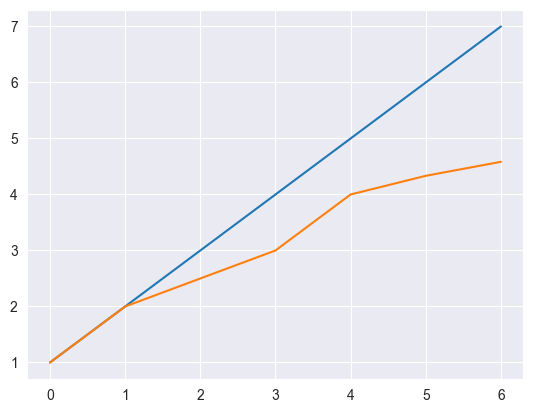

<Figure size 20000x20000 with 0 Axes>

In [6]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(200, 200))

ax1.plot(np.arange(len(prediction_matrices)), list(map(lambda x: get_accuracy(x)[0], prediction_matrices)))
ax1.plot(np.arange(len(prediction_matrices)), list(map(lambda x: get_accuracy(x)[1], prediction_matrices)))

In [7]:
prediction_matrix_old = ex.prediction_matrix
prediction_matrices_old = prediction_matrices.copy()

In [8]:
predict: np.ndarray = ex.predict(np.matrix([1, 1, 1, 0, 0, 0, 0, 1, 1, 1]).T)  # метро 
max_value = np.max(predict)
list(map(lambda x: classes[x], np.arange(predict.size)[predict == max_value])), predict

(['трамвай'], array([-20., -12., -14., -16., -16., -20., -22.]))

In [9]:
for i in range(100):
    column = randint(0, matrix.shape[1] - 1)
    ex._train_on_class(matrix[:, column], column, lambda x: prediction_matrices.append(x.prediction_matrix.copy()))

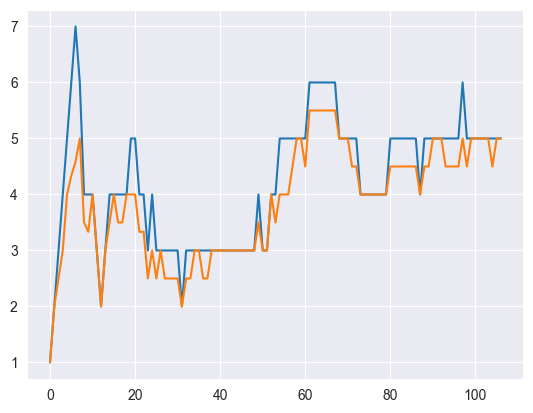

<Figure size 20000x20000 with 0 Axes>

In [10]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(200, 200))

ax1.plot(np.arange(len(prediction_matrices)), list(map(lambda x: get_accuracy(x)[0], prediction_matrices)))
ax1.plot(np.arange(len(prediction_matrices)), list(map(lambda x: get_accuracy(x)[1], prediction_matrices)))

In [11]:
predict: np.ndarray = ex.predict(np.matrix([1, 1, 1, 0, 0, 0, 0, 1, 1, 1]).T)  # метро 
max_value = np.max(predict)
list(map(lambda x: classes[x], np.arange(predict.size)[predict == max_value])), predict

(['трамвай'], array([-281., -145., -209., -245., -277., -277., -311.]))

In [12]:
def get_path(acc, prediction_matrices, path, level=0, the_same=0):
    old_accuracy = get_accuracy(prediction_matrices_old[-1])[acc]
    if level >= 1000 or the_same >= 100:
        return old_accuracy, path, prediction_matrices
    new_accuracies = []
    new_prediction_matrices = []
    for i, val in [(i, matrix[:, i]) for i in range(matrix.shape[1])]:
        ex.prediction_matrix = prediction_matrices_old[-1]
        ex._train_on_class(val, i)
        new_accuracies.append(get_accuracy(ex.prediction_matrix)[acc])
        new_prediction_matrices.append(ex.prediction_matrix)
    if max(new_accuracies) <= old_accuracy:
        return old_accuracy, path, prediction_matrices
    max_value = np.max(new_accuracies)
    argmaxs = np.arange(len(new_accuracies))[new_accuracies == max_value]
    return max(
        [get_path(acc, prediction_matrices + [new_prediction_matrices[argmax]], path + [argmax], level + 1,
                  the_same + 1 if path[-1] == argmaxs else 0)
         for argmax in argmaxs], key=lambda x: x[0])


accuracy, path, prediction_matrices = get_path(1, prediction_matrices_old.copy(), [i for i in range(matrix.shape[1])])

In [13]:
accuracy

4.583333333333333

In [14]:
path

[0, 1, 2, 3, 4, 5, 6]

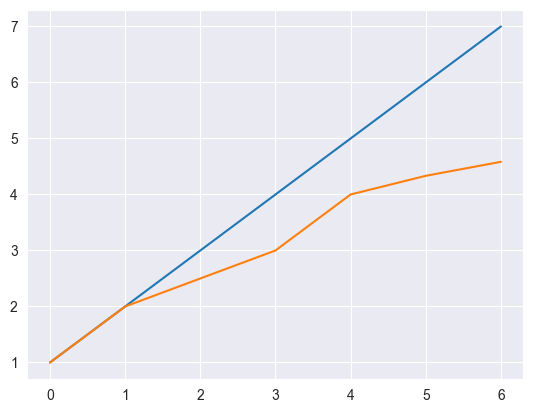

<Figure size 20000x20000 with 0 Axes>

In [15]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(200, 200))

ax1.plot(np.arange(len(prediction_matrices)), list(map(lambda x: get_accuracy(x)[0], prediction_matrices)))
ax1.plot(np.arange(len(prediction_matrices)), list(map(lambda x: get_accuracy(x)[1], prediction_matrices)))